In [9]:
from osgeo import gdal
import rasterio

In [13]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [11]:
from scipy import ndimage, misc

In [9]:
file_add = "D:\Education\IIRS\II_Year\Project_Thesis\Data_Preparation\RGBDV_Chips"

In [10]:
list_ = []
for x in os.listdir(file_add):
    if x.endswith(".tif"):
        list_.append(x)

In [11]:
list_

['rgbdv_1_1.tif',
 'rgbdv_1_10.tif',
 'rgbdv_1_2.tif',
 'rgbdv_1_3.tif',
 'rgbdv_1_4.tif',
 'rgbdv_1_5.tif',
 'rgbdv_1_6.tif',
 'rgbdv_1_7.tif',
 'rgbdv_1_8.tif',
 'rgbdv_1_9.tif']

In [12]:
file_list = []
for x in os.listdir(file_add):
    if x.endswith(".tif"):
        x= file_add + x
        file_list.append(x)

In [13]:
file_list

['D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_1.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_10.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_2.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_3.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_4.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_5.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_6.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_7.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_8.tif',
 'D:\\Education\\IIRS\\II_Year\\Project_Thesis\\Data_Preparation\\RGBDV_Chipsrgbdv_1_9.tif']

In [14]:
len(file_list)

10

In [29]:
file = r'D:\Education\IIRS\II_Year\Project_Thesis\Data_Preparation\RGBDV_Chips\rgbdv_1_1.tif'
ext = os.path.basename(file).split('.')[0]
ext

['rgbdv_1_1', 'tif']

In [42]:
def image_rot(inpf, inp_name):

    path = os.path.join(inpf, inp_name)
    img = gdal.Open(path)
    fn = os.path.basename(path).split('.')[0]
    
#     band1 = dataset.GetRasterBand(1) # Red channel
#     band2 = dataset.GetRasterBand(2) # Green channel
#     band3 = dataset.GetRasterBand(3) # Blue channel
#     band4 = dataset.GetRasterBand(4) # DSM channel
#     band5 = dataset.GetRasterBand(5) # VDVI channel
    
    b1 = img.GetRasterBand(1).ReadAsArray()
    b2 = img.GetRasterBand(2).ReadAsArray()
    b3 = img.GetRasterBand(3).ReadAsArray()
    b4 = img.GetRasterBand(4).ReadAsArray()
    b5 = img.GetRasterBand(5).ReadAsArray() 
    
#     b1=img[0]
#     b2=img[1]
#     b3=img[2]
#     b4=img[3]
#     b5=img[4]
    
    b1r1 = ndimage.rotate(b1, 90, reshape=False)
    b2r1 = ndimage.rotate(b2, 90, reshape=False)
    b3r1 = ndimage.rotate(b3, 90, reshape=False)
    b4r1 = ndimage.rotate(b4, 90, reshape=False)
    b5r1 = ndimage.rotate(b5, 90, reshape=False)
    s1 = np.stack((b1r1, b2r1, b3r1, b4r1, b5r1) , axis=0)
    
    b1r2 = ndimage.rotate(b1, 180, reshape=False)
    b2r2 = ndimage.rotate(b2, 180, reshape=False)
    b3r2 = ndimage.rotate(b3, 180, reshape=False)
    b4r2 = ndimage.rotate(b4, 180, reshape=False)
    b5r2 = ndimage.rotate(b5, 180, reshape=False)
    s2 = np.stack((b1r2, b2r2, b3r2, b4r2, b5r2) , axis=0)
    
    b1r3 = ndimage.rotate(b1, 270, reshape=False)
    b2r3 = ndimage.rotate(b2, 270, reshape=False)
    b3r3 = ndimage.rotate(b3, 270, reshape=False)
    b4r3 = ndimage.rotate(b4, 270, reshape=False)
    b5r3 = ndimage.rotate(b5, 270, reshape=False)
    s3 = np.stack((b1r3, b2r3, b3r3, b4r3, b5r3) , axis=0)
    
    opf = r'D:\Education\IIRS\II_Year\Project_Thesis\Data_Preparation\RGBDV_Rotated'

    with rasterio.open(path) as r:
        profile = r.profile

    profile.update(count = 5, compress = 'lzw', nodata = 0)
    
    with rasterio.open(os.path.join(opf, 'rot90_' + fn + '.tif'), 'w', **profile) as dst :
        dst.write(s1)
        
    with rasterio.open(os.path.join(opf, 'rot180_' + fn + '.tif'), 'w', **profile) as dst :
        dst.write(s2)
        
    with rasterio.open(os.path.join(opf, 'rot270_' + fn + '.tif'), 'w', **profile) as dst :
        dst.write(s3)

    return 'done'


inpf = r'D:\Education\IIRS\II_Year\Project_Thesis\Data_Preparation\RGBDV_Chips'
files = os.listdir(inpf)
gtif = list(filter(lambda x: x.endswith('tif'), files))
for gi in gtif:
    image_rot(inpf, gi)


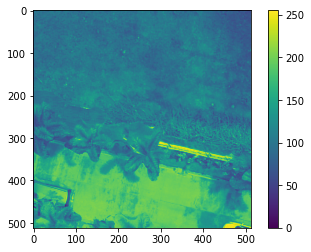

In [44]:
plt.imshow(b1r1)
plt.colorbar()